# Credit Risk Analytics

This project involves an in-depth analysis of a loan dataset from a consumer finance company. It aim to identify patterns and factors that indicate whether a loan applicant is likely to default on the loan, enabling the lending company to make informed lending decisions and minimize credit loss.

## 1. Data Understanding

### a. Reading the Dataset and Understanding the General Structure

In [27]:
#Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Reading the dataset into a DataFrame
original_df = pd.read_csv("loan.csv")

C:\Users\shahp\AppData\Local\Temp\ipykernel_14900\4158003575.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("loan.csv")


The warning is due to Column (47) have mixed data types. That need to be considered in Data cleaning process 

In [29]:
#Displaying first 5 rows of the dataframe
original_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Here we can see first 5 rows of dataset and can observe there are lots of missing values.<br>
That also need to be considered during data cleaning process

In [30]:
# Viewing summary of dataframe structure
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [31]:
# Shape of the dataframe
original_df.shape

(39717, 111)

In [32]:
# printing total number of rows and columns [i.e shape(rows, columns)]
print(f"Total number of columns: {original_df.shape[0]}")
print(f"Total number of rows: {original_df.shape[1]}")

Total number of columns: 39717
Total number of rows: 111


### b. Summary Statistics

In [33]:
# Describing the statistical data of the numerical data of the dataframe
original_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Different statistics can be observed like (mean, median, min, max, etc)<br>
For few columns like loan_amnt, funded_amnt, it is quite understandable.<br>
But for few columns like num_tl_op_past_12m, pct_tl_nvr_dlq, etc it is non understandable due to irrelavant data. Perhaps that can be cleared in data cleaning process by different strategies like dropping null, outliers etc

### d. Missing values

Since we can see lots of null values in our previous observations, let's check the occurance of null values in the dataframe

In [36]:
#Calculating total number of missing values(null/NaN)
print("Total number of missing values in the DataFrame:", original_df.isnull().sum().sum())

Total number of missing values in the DataFrame: 2263364


In [37]:
#Calculating the number of columns with all null values
num_columns_with_all_null = original_df.isnull().all().sum()
print(f"Number of columns with all null values: {num_columns_with_all_null}")

# Calculating the number of columns with at least one null values
num_columns_with_missing_values = original_df.columns[original_df.isnull().any()].nunique()
print(f"Number of columns with at least one null values: {num_columns_with_missing_values}")

Number of columns with all null values: 54
Number of columns with at least one null values: 68


We have checked all the missing values in the dataset. <br>
- Columns with all null values must be dropped. <br>
- For columns with at least one null value, we should consider the threshold. <br>
    Columns with null values exceeding the threshold should be dropped, while those not exceeding the threshold should be considered for options such as imputation or removing rows with null values.

### e. Consistent Values

Let's see the columns where all the values are *zero/same* i.e. `consistent values`

In [38]:
# Checking the columns having all the values same
same_value_columns = original_df.columns[original_df.nunique() == 1]

for column in same_value_columns:
    value = original_df[column].iloc[0]
    print(f"Column: '{column}' --> {value}")

Column: 'pymnt_plan' --> n
Column: 'initial_list_status' --> f
Column: 'collections_12_mths_ex_med' --> 0.0
Column: 'policy_code' --> 1
Column: 'application_type' --> INDIVIDUAL
Column: 'acc_now_delinq' --> 0
Column: 'chargeoff_within_12_mths' --> 0.0
Column: 'delinq_amnt' --> 0
Column: 'tax_liens' --> 0.0


These columns can be droped since it doesn't have any use in our analysis because all the values are same. Doesn't make sense for the analysis

### e. Data Format and Types

In [40]:
# Finding the data types of all variables in dataframe
data_types = original_df.dtypes
data_types

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [41]:
original_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [42]:
data_types.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

We can see here there are three types of data types `int64`, `float64`, `O`(object)<br>
Data types of few columns like term, int_rate, etc need to be changed.

### f. Outliers

In [43]:
# Defining few numerical columns in order to check outliers
numerical_columns = ['loan_amnt', 'annual_inc', 'funded_amnt', 'installment']

# Finding outliers of all four variables
for column in numerical_columns:
    # first quartile (Q1)
    Q1 = original_df[column].quantile(0.25)

    # third quartile (Q3)
    Q3 = original_df[column].quantile(0.75)

    # interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculating the lower bound and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = original_df[(original_df[column] < lower_bound) | (original_df[column] > upper_bound)]

    # Printing the column name and the number of outliers
    print(f"Outliers in {column}: {outliers.shape[0]}")


Outliers in loan_amnt: 1230
Outliers in annual_inc: 1843
Outliers in funded_amnt: 1038
Outliers in installment: 1245


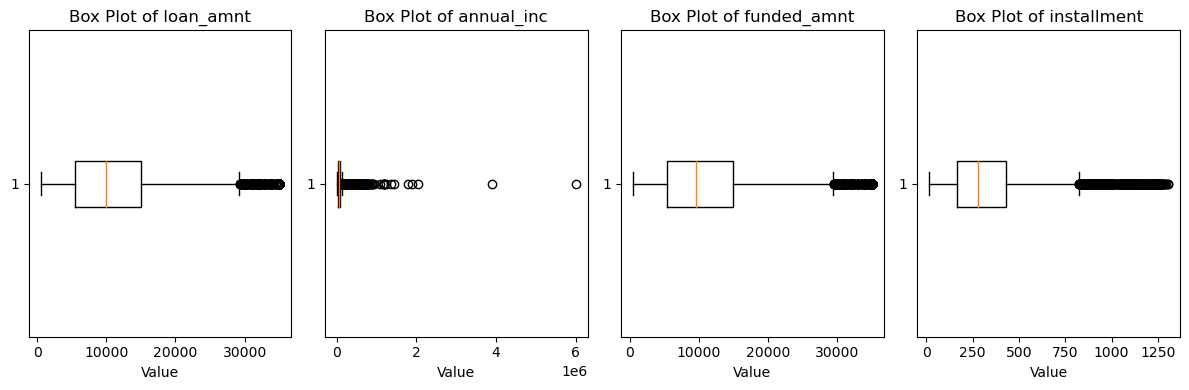

In [45]:
numerical_columns = ['loan_amnt', 'annual_inc', 'funded_amnt', 'installment']

# Creating a box plot for the those four varables
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(12, 4))

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(original_df[column], vert=False)
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel('Value')

# Adjusting the layout
plt.tight_layout()
plt.show()


We can see lots of outliers are there that need to be removed. <br>
Outliers should also be considered in data cleaning process.

### g. Variable meaning

In [46]:
# Print the names of all variables
original_df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Here we can see few variables name doesn't reflect to the actual meaning and is difficult to understand. Every time we have to refer Data Dictionary. So, name of the columns should also be changed in further cleaning process <br>
(Not that necessary but just for readability while doing analysis)

### h. Data Distribution

In [47]:
# Selecting only numerical columns
numerical_columns = original_df.select_dtypes(include=['int64', 'float64'])

# Calculating skewness for each numerical column
skewness = numerical_columns.apply(lambda x: x.skew())

# Printing skewness values
print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
id                            0.078808
member_id                    -0.212416
loan_amnt                     1.059317
funded_amnt                   1.081710
funded_amnt_inv               1.106213
                                ...   
tax_liens                     0.000000
tot_hi_cred_lim                    NaN
total_bal_ex_mort                  NaN
total_bc_limit                     NaN
total_il_high_credit_limit         NaN
Length: 87, dtype: float64


In [ ]:
# Assuming 'skewness' is a Series containing skewness values
normally_distributed = sum((-0.5 <= skewness) & (skewness <= 0.5))
left_skewed = sum(skewness < -0.5)
right_skewed = sum(skewness > 0.5)

print("Normally Distributed Variables:", normally_distributed)
print("Left-Skewed Variables:", left_skewed)
print("Right-Skewed Variables:", right_skewed)


Among 111 variables in dataset only skewness of 33 has been calculated. <br>
It either means rest other columns are non numerical variables OR the columns have all value missing.<br>
Now, it can be seen that dataset are not at all distributed normally. So, it need to be cleaned in various way like, dropping missing values, removing outliers, changing datatypes of the variables

### i. Summary

a. **Reading Dataset and understanding general structure of the dataset**:
   - We successfully loaded the dataset into `original_df` and viewed the general structure of the dataset, including its shape, number of columns and rows, etc.

b. **Summary Statistics**:
   - Viewing summary statistics (mean, median, max, min, etc.) for numerical data helped us understand the central tendencies and data spread, enabling us to consider further steps.

c. **Handling Missing Values**:
   - We addressed missing values by considering two scenarios:
     - Columns with all null values: Should be dropped in cleaning process.
     - Columns with at least one null value: We applied a threshold:
       - Columns with null values exceeding the threshold should be dropped.
       - For columns with null values below the threshold, we should considered options such as imputation or removing rows with null values.

d. **Consistent Values**:
   - Columns where all values were either zero/same should be removed in data cleaning process.

e. **Data Format and Types**:
   - We identified issues related to data format, including string values for dates, which needed transformation during the data cleaning process.
   - Additionally, we recognized the need to change the data types of specific variables.

f. **Handling Outliers**:
   - We detected numerous outliers in the variables, emphasizing the importance of addressing them during the data cleaning process.

g. **Clarifying Variable Names**:
   - Some variable names were found to be unclear or not reflective of their actual meaning, highlighting the need for renaming during the cleaning process.

h. **Data Distribution**:
   - Observing the data distribution, we noted that most variables were not normally distributed. This prompted us to consider various data cleaning approaches, including dropping missing values, removing outliers, changing variable data types, and more.


Before starting a cleaning process lets keep the backup of original data frame to `original_df` and copy the dataframe to `df` and we will be using that for further

In [ ]:
df = original_df.copy()

## 2. Data Cleaning and Manipulation

In [ ]:
# 68 columns have null values in it. But, deleting all those column might result to the loss of data.
# Lets delete the columns with more than 30% of the values null

Gramatically correct

In [ ]:
# Define a threshold for the maximum allowable missing values
max_missing_threshold = 0.3

# Calculate the percentage of missing values in each column
columns_with_missing_values = df.isnull().mean()

# Drop columns with missing values exceeding the threshold
columns_to_drop = columns_with_missing_values[columns_with_missing_values > max_missing_threshold].index

# Drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df.shape

In [ ]:
df.columns.tolist()

In [ ]:
df.head(20)

In [ ]:
# Still can see lots of columns with values zero that is also the non essential columns.
# Lets drop columns with all the values zero by keeping threshold 100%

In [ ]:
# Define a threshold for the maximum allowable zero values
max_zero_threshold = 1  # This threshold is set to 1, meaning all zeros

# Calculate the sum of values equal to zero in each column
columns_with_zero_values = (df == 0).sum()

# Drop columns with zero values exceeding the threshold
columns_to_drop = columns_with_zero_values[columns_with_zero_values > max_zero_threshold].index


print(f"Number of columns with all values 0: {len(columns_to_drop)}")

In [ ]:
#Dropping all those 22 columns with all values 0

In [ ]:
df = df.drop(columns=columns_to_drop)

Total Columns remaining

In [ ]:
df.shape[1]

In [ ]:
df.columns.tolist()

In [ ]:
df.head(20)

In [ ]:
# Now checking one by one and listing out the non essential collumns first then will be removing the data with null values later

In [ ]:
df.columns.tolist()

In [ ]:
# id is not essential
# member_id is not usually essential. But, lets keep this unique id just in case in future if we want to use other columns which is not in current dataframe, then using id we can map the original_df to the df
# loan_amt, funded_amnt, term, int_rate, installment, 'grade', 'sub_grade' are essential columns
# emp_title, emp_length is not that essential
# home_ownership maybe essential
# anual_inc is essential for analysis
# verification_status maybe essential
# issue_d not essential

In [ ]:
df['loan_status'].unique()

In [ ]:
# loan_status is essential column but the rows with 'Current' is not essential Will do row part later

In [ ]:
df['pymnt_plan'].unique()

In [ ]:
# pymnt_plan not essential since all value are 'n'
# url, desc not essential for analysis
# purpose maybe essential

In [ ]:
df['title'].head(50)

In [ ]:
# title consists of long string and will be difficult for analysis since purpose explains about title, tittle is also non essential
# zip_code, addr_state not essential for now, if it we think can be essential later can be added later
# earliest_cr_line not essential for now
# open_acc, revol_util, total_acc, initial_list_status,'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' can be essential, if not can be removed later

In [ ]:
df['policy_code'].unique()

In [ ]:
# policy_code is not essential since all the values are '1'

In [ ]:
df['application_type'].unique()

In [ ]:
# application_type not essential since all the the values are 'INDIVIDUAL' so can be excluded

In [ ]:
# Final list of columns that are non essential are:
# id, emp_title, emp_length, issue_d, pymnt_plan, url, desc, title, zip_code, addr_state, earliest_cr_line, policy_code, application_type

In [ ]:
df_with_dropped_null_and_zero = df.copy() #Run only once

df = df_with_dropped_null_and_zero.copy #Run only if you need to go back to the last backup dataframe

In [ ]:
# Deleting the columns that won't be used in further analysis
columns_to_delete = ['id', 'emp_title', 'emp_length', 'issue_d', 'pymnt_plan', 'url',
                      'title', 'zip_code', 'addr_state', 'earliest_cr_line',
                     'last_credit_pull_d', 'policy_code', 'application_type']

# Dropping the specified columns
df.drop(columns=columns_to_delete, inplace=True)

In [ ]:
# Count the total number of null values in each column
null_value_counts = df.isnull().sum()

# Sum the null value counts to get the total number of null values
total_null_values = null_value_counts.sum()

print("Total number of null values:", total_null_values)

In [ ]:
# Filter for columns with null values
columns_with_null_values = null_value_counts[null_value_counts > 0]

# Print the column names with null values
print("Columns with null values:")
print(columns_with_null_values.index.tolist())

In [ ]:
# last_pymnt_d can be excluded but revol_util is one of the most important factor to do analysis

In [ ]:
# Dropping column last_pymnt_d
df.drop("last_pymnt_d", axis=1, inplace=True)


In [ ]:
# Count the total number of null values in each column
null_value_counts = df.isnull().sum()

# Sum the null value counts to get the total number of null values
total_null_values = null_value_counts.sum()

print("Total number of null values:", total_null_values)

In [ ]:
# Filter for columns with null values
columns_with_null_values = null_value_counts[null_value_counts > 0]

# Print the column names with null values
print("Columns with null values:")
print(columns_with_null_values.index.tolist())

In [ ]:
# The only column left with null value is revol_util. But, revol_util is a percentage of credit balance usage
# Can't normalize all null values to zero nor mean.
# So lets drop all the rows of revol_util with null values

In [ ]:
df.shape

In [ ]:
df.dropna(subset=['revol_util'], inplace=True)

In [ ]:
# Remove the '%' symbol and convert to float
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)

# Now, the column should contain numerical values
df['revol_util'].head()


In [ ]:
df_with_dropped_null_and_zero.shape[0] - df.shape[0]

In [ ]:
# Count the total number of null values in each column
null_value_counts = df.isnull().sum()

# Sum the null value counts to get the total number of null values
total_null_values = null_value_counts.sum()

print("Total number of null values:", total_null_values)

In [ ]:
#Finally we were successfully able to drop all the null values

In [ ]:
df.describe()

#### Cleaning Row

In [ ]:
df.columns.tolist()

In [ ]:
df.shape

In [ ]:
df['loan_status'].unique()

In [ ]:
# We don't need 'Current' because they are neither defaulter nor fully paid customer and they won't be used for our analysis

In [ ]:
# Keeping only 'Fully Paid' and 'Charged Off' loan_status
df = df[df['loan_status'] != 'Current']

In [ ]:
df.shape

In [ ]:
data_types = df.dtypes
print(data_types)

In [ ]:
df['term'] = df['term'].astype('category')

In [ ]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

In [ ]:
df['grade'] = df['grade'].astype('category')
df['sub_grade'] = df['sub_grade'].astype('category')

In [ ]:
df['home_ownership'] = df['home_ownership'].astype('category')
df['verification_status'] = df['verification_status'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')
df['purpose'] = df['purpose'].astype('category')
df['initial_list_status'] = df['initial_list_status'].astype('category')


In [ ]:
data_types = df.dtypes
print(data_types)

In [ ]:
df.columns.tolist()

In [ ]:
import numpy as np

In [ ]:
from scipy import stats

# Define a list of columns to check for outliers
columns_to_check = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'open_acc', 'revol_util', 'total_acc']

# Initialize an empty DataFrame to store Z-scores
z_scores = pd.DataFrame()

# Calculate Z-scores for each column
for col in columns_to_check:
    z_scores[col] = np.abs(stats.zscore(df[col]))

# Set a threshold for Z-scores (e.g., 3 for significant outliers)
threshold = 3

# Identify rows with Z-scores beyond the threshold
outlier_rows = z_scores[(z_scores > threshold).any(axis=1)]

# Print the rows with potential outliers
print(outlier_rows)


In [ ]:
# Now lets go through all the columns
# loan_amnt and funded_amnt cant have outliers coz there can be people who can take very less loan and there can be people who can take much more loan
#

In [ ]:
Q1 = df['installment'].quantile(0.25)
Q3 = df['installment'].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
threshold_multiplier = 1.5
lower_threshold = Q1 - threshold_multiplier * IQR
upper_threshold = Q3 + threshold_multiplier * IQR


In [ ]:
df = df[(df['installment'] >= lower_threshold) & (df['installment'] <= upper_threshold)]


In [ ]:
df.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create subplots for each numeric column
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
sns.boxplot(data=numeric_columns, orient="h", palette="Set2")
plt.title("Box Plot of Numeric Columns")

# Show the plot
plt.show()


In [ ]:
# Calculate the IQR for annual_inc
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold
threshold = 1.5 * IQR

# Identify outliers
outliers = df[(df['annual_inc'] < Q1 - threshold) | (df['annual_inc'] > Q3 + threshold)]

# Remove outliers
df_clean = df[~df.index.isin(outliers.index)]

# Check the shape of the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_clean.shape)


In [ ]:
df = df_clean.copy()

In [ ]:
df.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create subplots for each numeric column
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
sns.boxplot(data=numeric_columns, orient="h", palette="Set2")
plt.title("Box Plot of Numeric Columns")

# Show the plot
plt.show()


In [ ]:
#Exploratory Data Analysis (EDA): Explore the cleaned dataset to gain insights and understand the data better.
# Summary statistics
summary_stats = df.describe()

# Value counts for categorical columns
categorical_columns = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status']
value_counts = {col: df[col].value_counts() for col in categorical_columns}

# Correlation matrix (if applicable for numeric columns)
correlation_matrix = df.corr()
correlation_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize loan status counts
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of loan amount by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='loan_amnt', palette='Set2')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of annual income and loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='annual_inc', y='loan_amnt', hue='loan_status', palette='Set2')
plt.title('Scatter Plot of Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

# Plotting count of grades
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grade', palette='Set2')
plt.title('Grade Counts')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# Correlation heatmap for numeric variables
corr_matrix = df[['loan_amnt', 'annual_inc', 'int_rate', 'installment', 'open_acc', 'total_acc']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualize 'revol_util' using a histogram
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)  # Convert 'revol_util' to float
plt.figure(figsize=(10, 6))
sns.histplot(df['revol_util'], bins=30, kde=True)
plt.title('Distribution of Revolving Line Utilization Rate')
plt.xlabel('Revolving Line Utilization Rate')
plt.ylabel('Frequency')
plt.show()

# Bivariate analysis: 'revol_util' vs 'loan_status'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='revol_util', palette='Set2')
plt.title('Revolving Line Utilization Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Line Utilization Rate')
plt.xticks(rotation=45)
plt.show()

# Plot for 'total_acc'
plt.figure(figsize=(10, 6))
sns.histplot(df['total_acc'], bins=30, kde=True)
plt.title('Distribution of Total Accounts')
plt.xlabel('Total Accounts')
plt.ylabel('Frequency')
plt.show()

# Segmented univariate analysis: 'total_acc' by 'loan_status'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='total_acc', palette='Set2')
plt.title('Total Accounts by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Total Accounts')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['loan_status'].head()

In [ ]:
df['loan_status']

# ...................................................................................................................................

In [ ]:
df.columns.tolist()

In [ ]:
# List of non-essential columns to drop
non_essential_columns = ['id', 'pymnt_plan','url', 'desc', 'policy_code',
                         'application_type', 'annual_inc_joint','dti_joint','verification_status_joint', 'next_pymnt_d', 'tax_liens', 'initial_list_status']

# Drop non-essential columns
loan_data = loan_data.drop(columns=non_essential_columns)

In [ ]:
# Check for missing values in each column
missing_values = loan_data.isnull().sum()

# Display the columns with missing values and the count of missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

# Check for outliers or inconsistencies as needed
# You can use descriptive statistics (e.g., describe()) to identify outliers.

# Interpret the meanings of variables by referring to the Data Dictionary
# Ensure that you understand what each variable represents.


In [ ]:
loan_data.describe()

In [ ]:
import matplotlib.pyplot as plt

# Calculate summary statistics for loan_amnt and annual_inc
loan_data[['loan_amnt', 'annual_inc']].describe()

# Create box plots for loan_amnt and annual_inc
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(loan_data['loan_amnt'], vert=False)
plt.title('Box Plot for loan_amnt')

plt.subplot(2, 1, 2)
plt.boxplot(loan_data['annual_inc'], vert=False)
plt.title('Box Plot for annual_inc')

plt.tight_layout()
plt.show()


In [ ]:
# Check unique values in the home_ownership and grade columns
print("Unique values in home_ownership:")
print(loan_data['home_ownership'].unique())

print("\nUnique values in grade:")
print(loan_data['grade'].unique())


In [ ]:
df.shape

In [ ]:
# Identify columns with missing values
missing_values = original_df.isnull().sum()

# Loop through columns and fill missing values
for column in original_df.columns:
    if missing_values[column] > 0:
        if original_df[column].dtype == 'object':
            # For categorical columns, fill with the mode
            original_df[column].fillna(original_df[column].mode()[0], inplace=True)
        else:
            # For numeric columns, fill with the mean
            original_df[column].fillna(original_df[column].mean(), inplace=True)


In [ ]:
# Impute missing values in numerical columns with the mean
numerical_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numerical_columns] = loan_data[numerical_columns].fillna(loan_data[numerical_columns].mean())

# Impute missing values in categorical columns with the mode
categorical_columns = loan_data.select_dtypes(include=['object']).columns
loan_data[categorical_columns] = loan_data[categorical_columns].fillna(loan_data[categorical_columns].mode().iloc[0])

# Check if there are any remaining missing values
remaining_missing = loan_data.isnull().sum().sum()
print("Remaining Missing Values:", remaining_missing)


In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (loan_data.isnull().sum() / len(loan_data)) * 100

# Set a threshold for missing values (e.g., 80%)
threshold = 80

# Identify columns with missing values exceeding the threshold
high_missing_columns = missing_percentage[missing_percentage > threshold].index.tolist()

# Decide whether to drop or impute these columns
# For example, you can drop them as follows:
loan_data = loan_data.drop(columns=high_missing_columns)

# Impute missing values in remaining columns with sentinel values
# For example, you can impute missing values in numerical columns with -1
numerical_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numerical_columns] = loan_data[numerical_columns].fillna(-1)

# Impute missing values in categorical columns with 'Unknown'
categorical_columns = loan_data.select_dtypes(include=['object']).columns
loan_data[categorical_columns] = loan_data[categorical_columns].fillna('Unknown')

# Check if there are any remaining missing values
remaining_missing = loan_data.isnull().sum().sum()
print("Remaining Missing Values:", remaining_missing)


In [ ]:
# Identify date columns
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d']

# Convert date columns to datetime
for col in date_columns:
    loan_data[col] = pd.to_datetime(loan_data[col], format='%b-%y', errors='coerce')


In [ ]:
# Convert date columns to datetime format (if applicable)
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])

# Handle string columns as needed (e.g., removing special characters, converting to lowercase, etc.)
# For example, you can clean the 'term' column to extract the numeric part.
loan_data['term'] = loan_data['term'].str.extract('(\d+)').astype(int)


In [ ]:
# Example: Create a new variable 'loan_to_income_ratio'
loan_data['loan_to_income_ratio'] = loan_data['loan_amnt'] / loan_data['annual_inc']

In [ ]:
# Save the cleaned dataset to a new CSV file
loan_data.to_csv("cleaned_loan_data.csv", index=False)

In [ ]:
loan_data = pd.read_csv('cleaned_loan_data.csv')

In [ ]:
# Summary statistics
summary_stats = loan_data.describe()

# Histogram of loan amounts
import matplotlib.pyplot as plt
plt.hist(loan_data['loan_amnt'], bins=20, edgecolor='k')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()


In [ ]:
# Example: Box plot of loan amounts by loan status
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amounts by Loan Status')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Example: Correlation heatmap of numerical variables
correlation_matrix = loan_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Example: Analyzing the loan-to-income ratio
plt.hist(loan_data['loan_to_income_ratio'], bins=20, edgecolor='k')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Loan-to-Income Ratio')
plt.show()


In [ ]:
loan_data.shape[1]